In [188]:
#https://www.kaggle.com/competitions/titanic

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Data collection and processing

In [190]:
DataPath = "C:\\Users\\gregl\\Desktop\\ML_Projects\\Titanic Prediction\\titanic.csv"
titanic_data = pd.read_csv(DataPath)

In [191]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [192]:
titanic_data.shape

(891, 12)

In [193]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling the missing values

### drop the cabin column from the dataframe

In [195]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

### Clean the data

In [196]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [197]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [198]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [199]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis

In [200]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
survived = titanic_data['Survived'] == 1
survived.sum()

np.int64(342)

In [202]:
not_survived = titanic_data['Survived'] == 0
not_survived.sum()

np.int64(549)

In [203]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

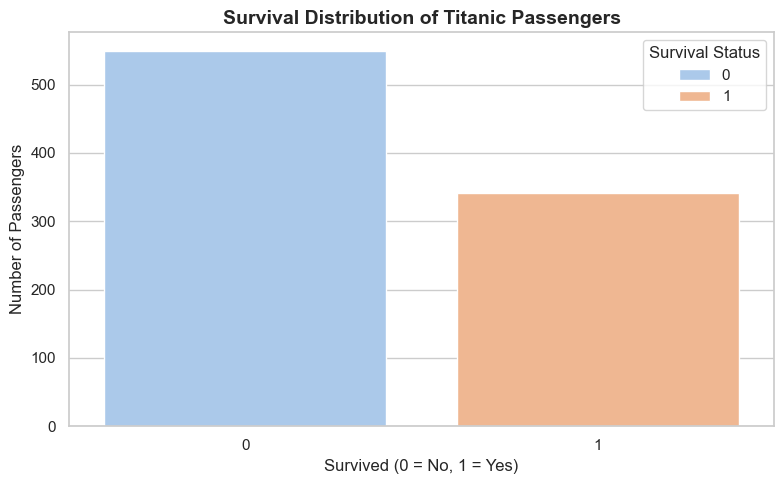

In [204]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic_data, hue='Survived')

plt.title('Survival Distribution of Titanic Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

C:\Users\gregl\AppData\Local\Temp\ipykernel_14436\2709692814.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


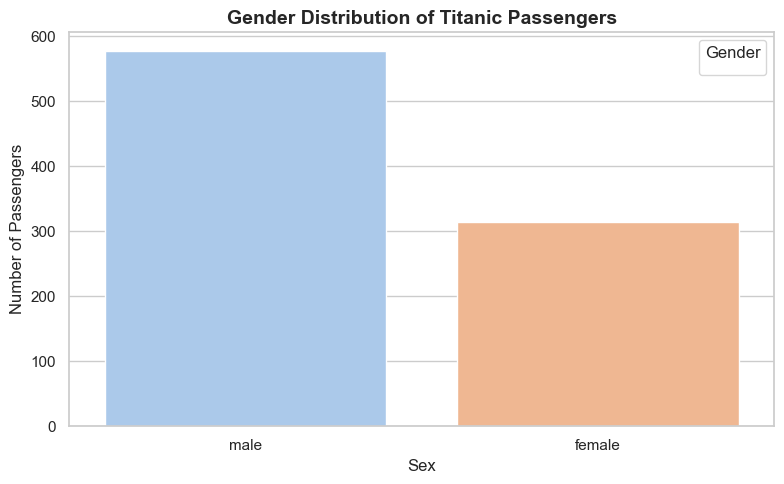

In [205]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=titanic_data, hue='Sex')

plt.title('Gender Distribution of Titanic Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Passengers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

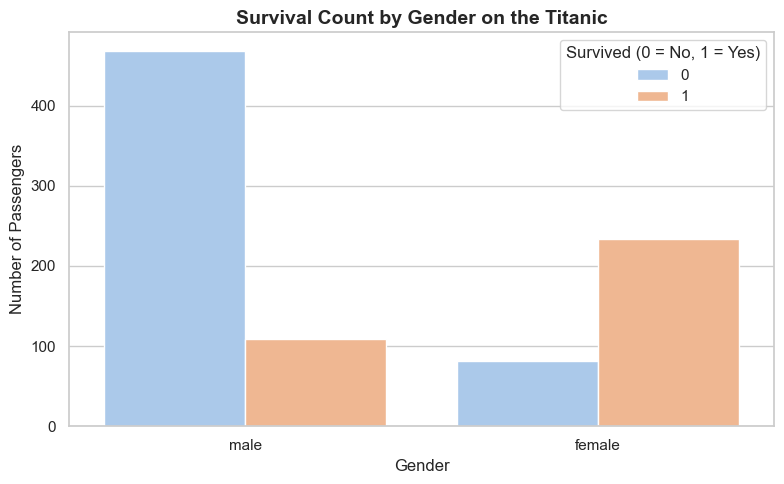

In [206]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=titanic_data, hue='Survived')

plt.title('Survival Count by Gender on the Titanic', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

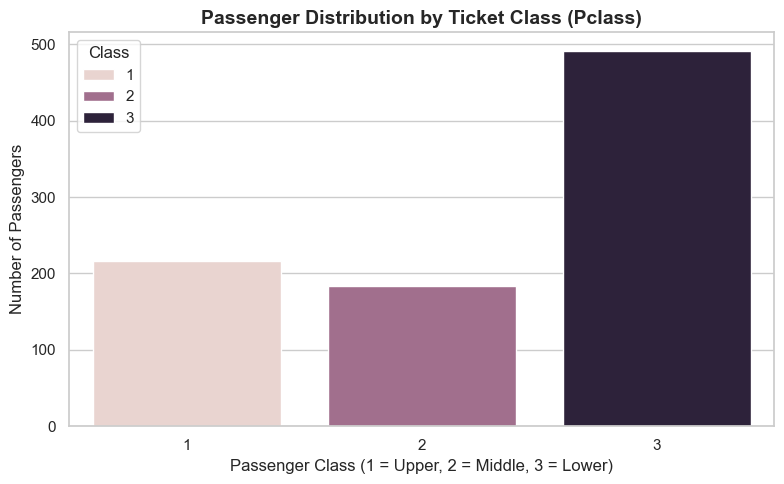

In [207]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=titanic_data, hue='Pclass')

plt.title('Passenger Distribution by Ticket Class (Pclass)', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Number of Passengers')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

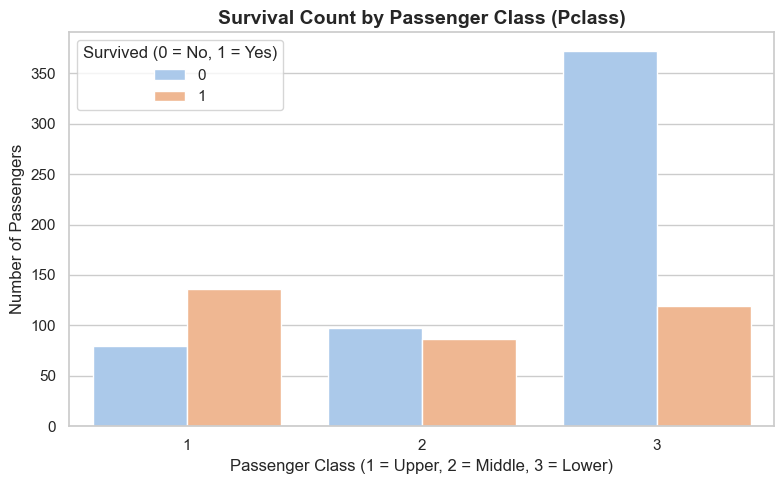

In [208]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=titanic_data, hue='Survived')

plt.title('Survival Count by Passenger Class (Pclass)', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

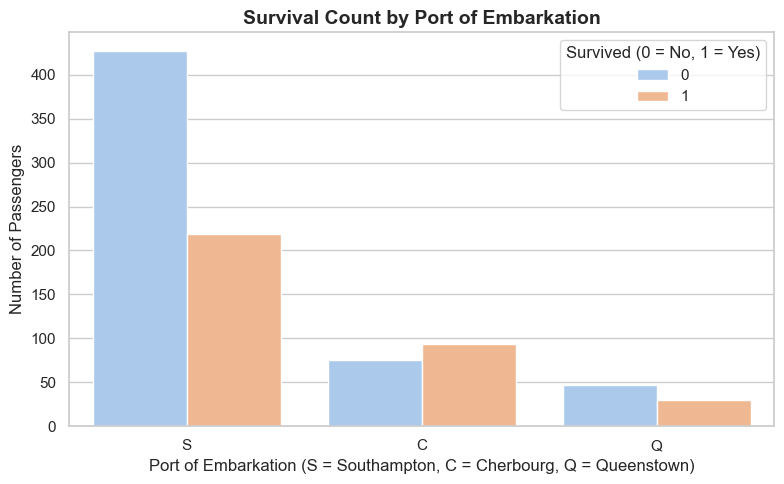

In [209]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic_data, hue='Survived')

plt.title('Survival Count by Port of Embarkation', fontsize=14, fontweight='bold')
plt.xlabel('Port of Embarkation (S = Southampton, C = Cherbourg, Q = Queenstown)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

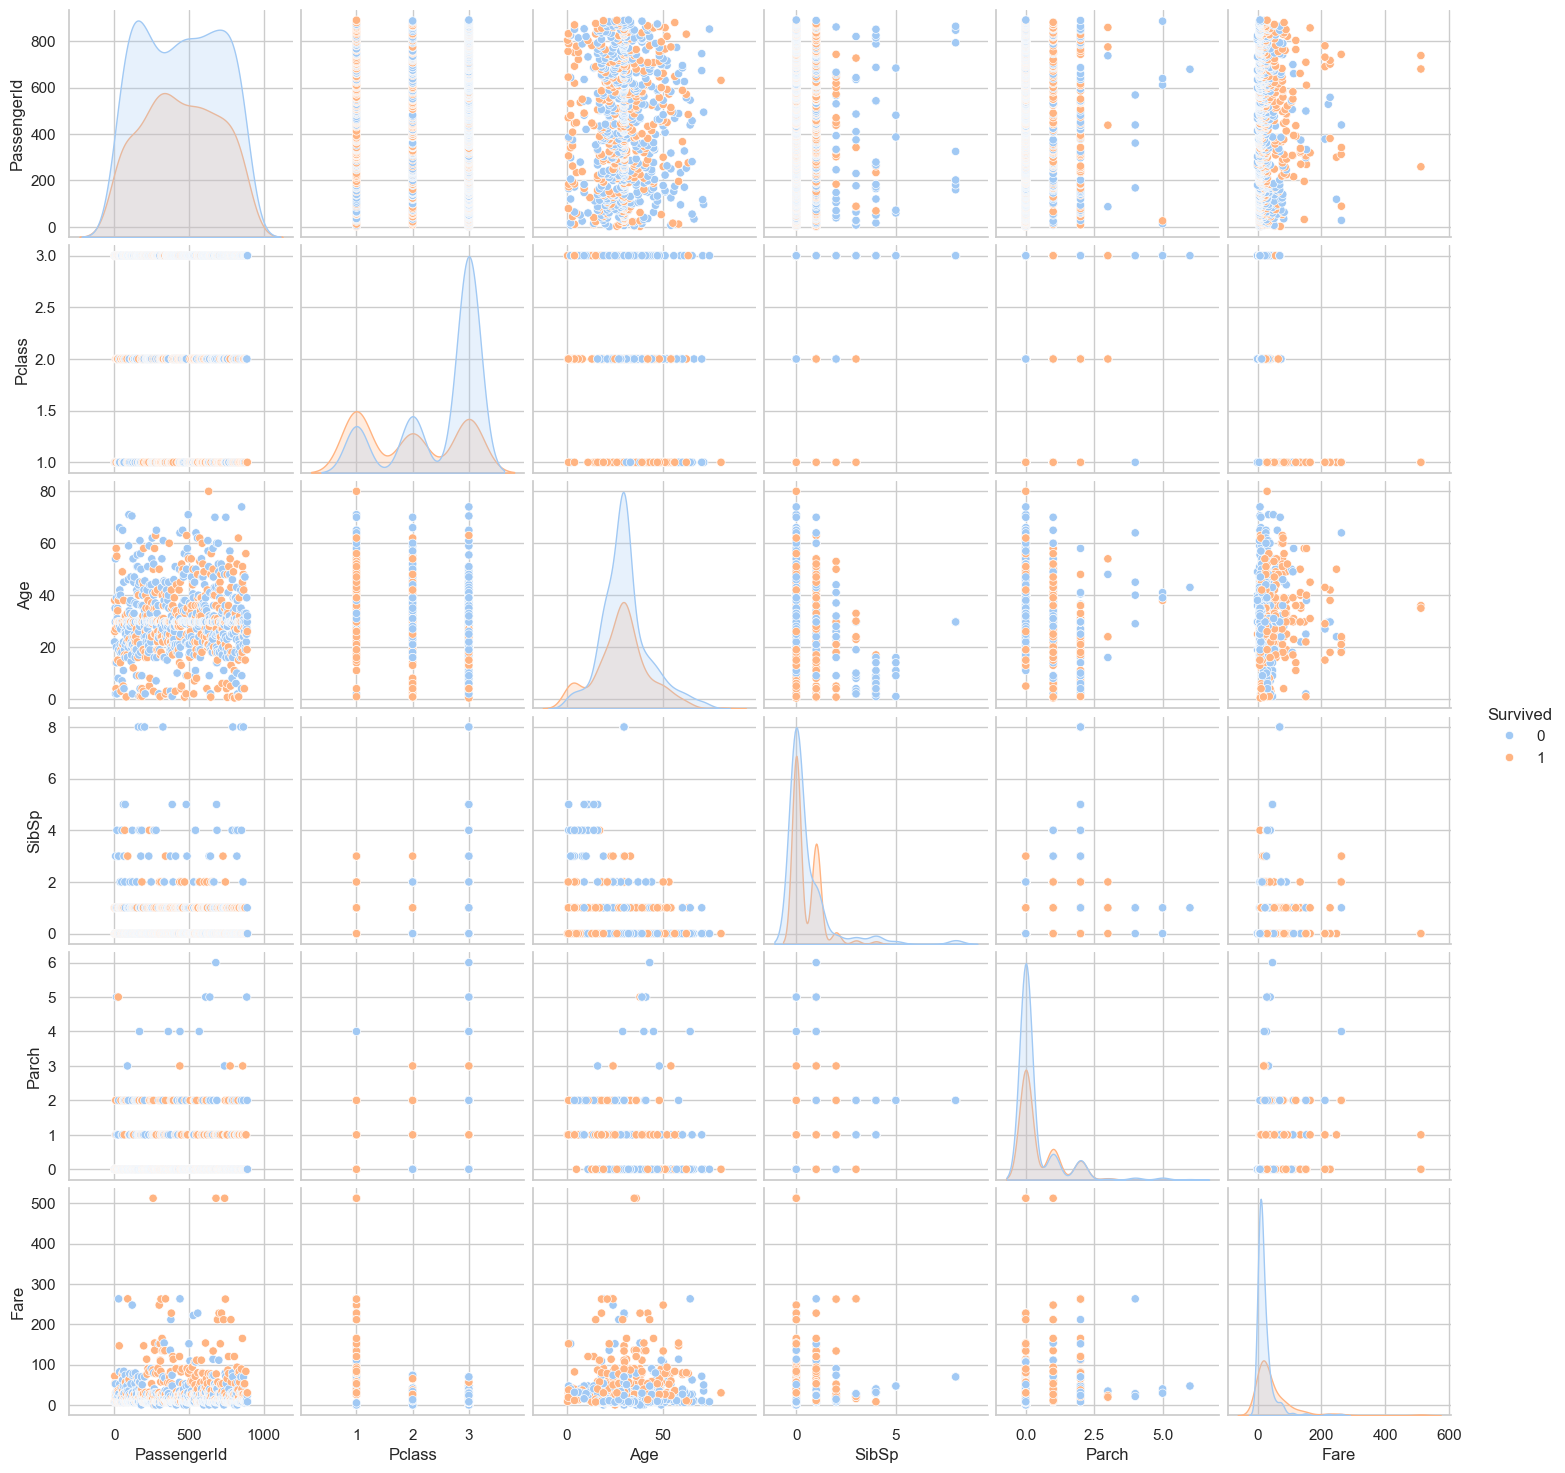

In [210]:
_ = sns.pairplot(titanic_data, hue='Survived')

### Encoding the categorical data

In [211]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [212]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [213]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [214]:
titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 0, 'female': 1}).astype(int)
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(int)

C:\Users\gregl\AppData\Local\Temp\ipykernel_14436\3144337496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 0, 'female': 1}).astype(int)
C:\Users\gregl\AppData\Local\Temp\ipykernel_14436\3144337496.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data['Embarked'] = titanic_data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}).astype(int)


In [215]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separating our target (survived) from the features

In [216]:
X = titanic_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = titanic_data['Survived']